In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
my_file = os.getcwd() +  '/data/unconv_MV_v5.csv'

raw_data = pd.read_csv(my_file)

raw_data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [3]:
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

In [4]:
X = raw_data['Por'].values.reshape(-1,1)
y = raw_data['Prod'].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################



In [5]:
r2 = model.score(X, y)

############################################## Plot ################################################



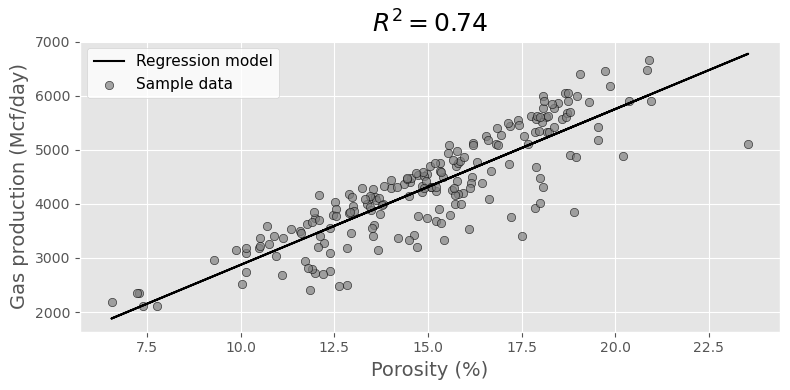

In [6]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)

ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

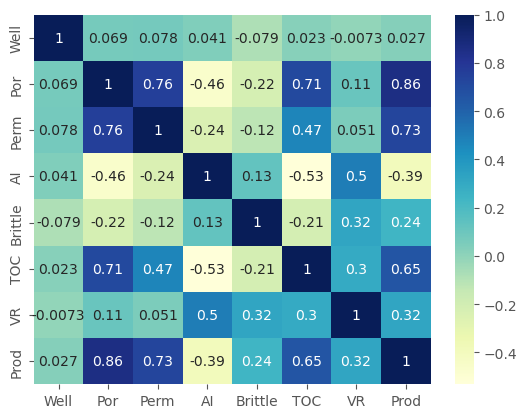

In [7]:
sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot=True);

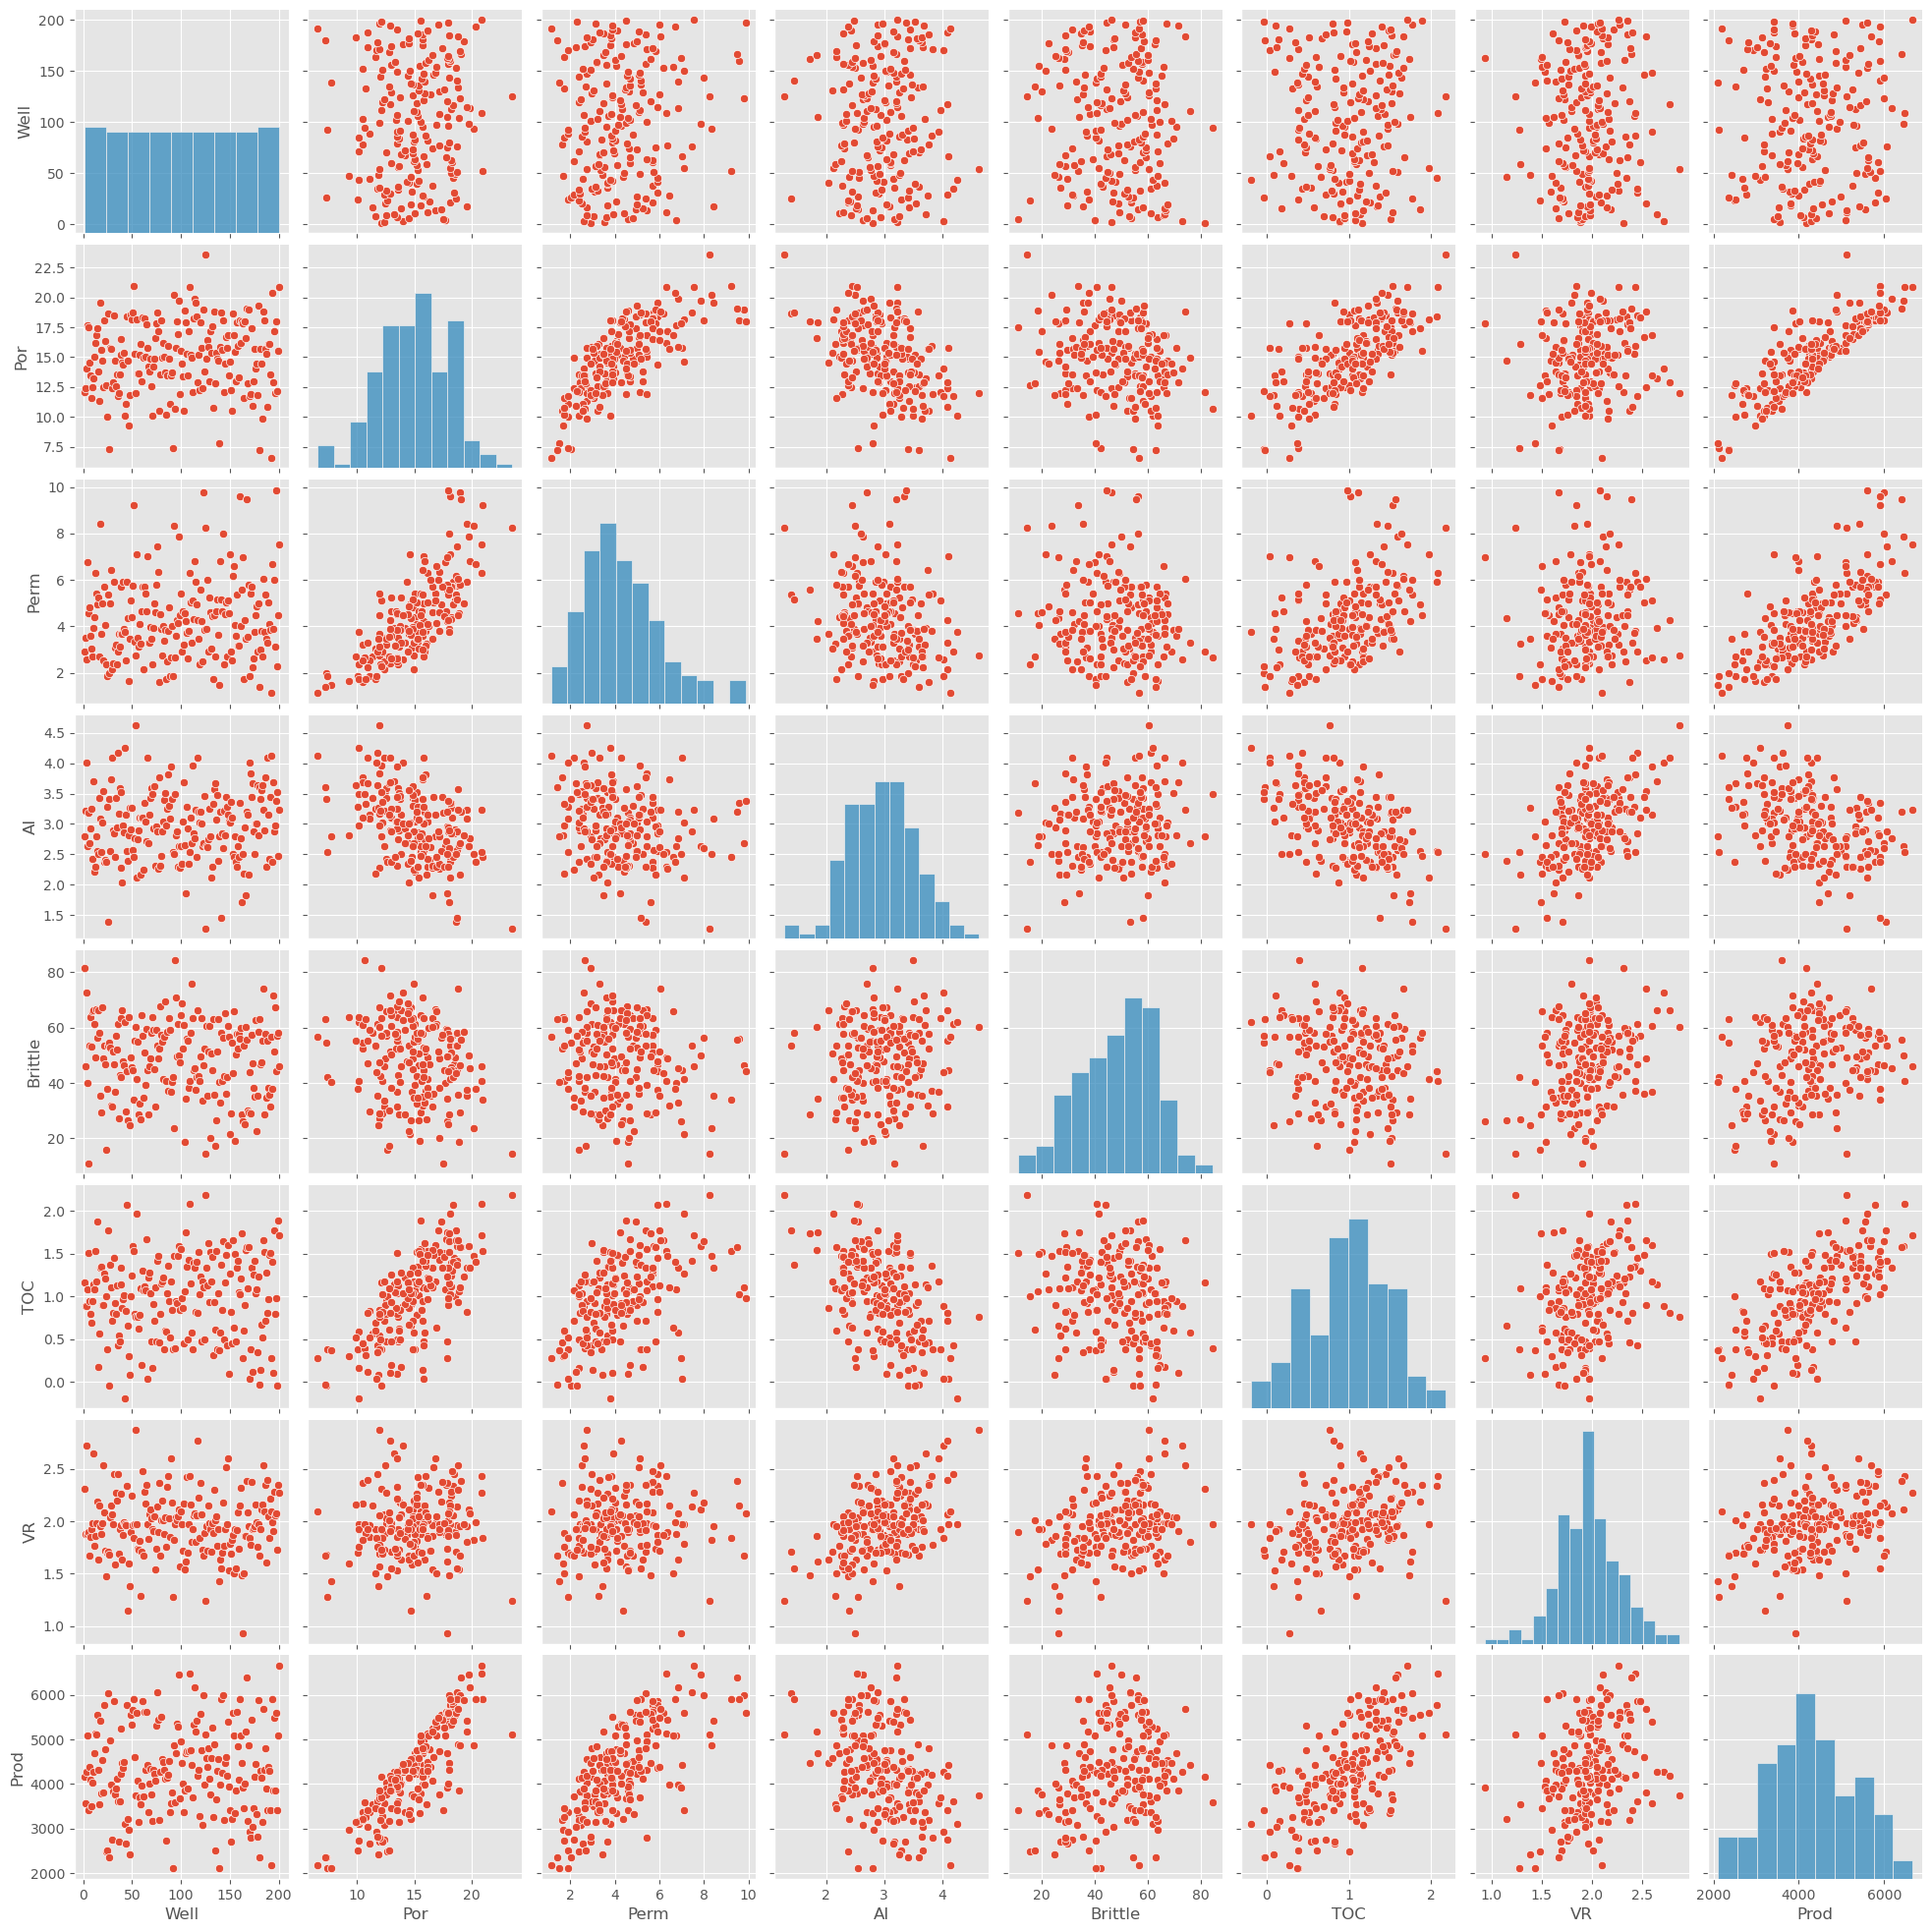

In [8]:
sns.pairplot(raw_data)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import rfpimp

#modificar 
#from sklearn.ensemble._forest import _generate_unsampled_indices
#from sklearn.ensemble import _forest
# En la paqueteria que instala anaconda = anaconda3\pkgs\rfpimp-1.3.2-py_0

######################################## Train/test split #########################################

df_train, df_test = train_test_split(raw_data, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

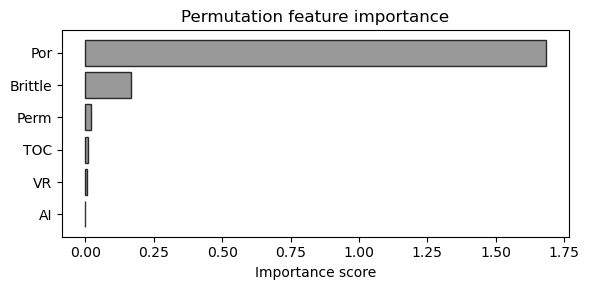

In [14]:

imp = rfpimp.importances(rf, X_test, y_test)

############################################## Plot ################################################

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')

plt.gca().invert_yaxis()

fig.tight_layout()

In [11]:
X = raw_data[['Por', 'Brittle']].values.reshape(-1,2)
Y = raw_data['Prod']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [12]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

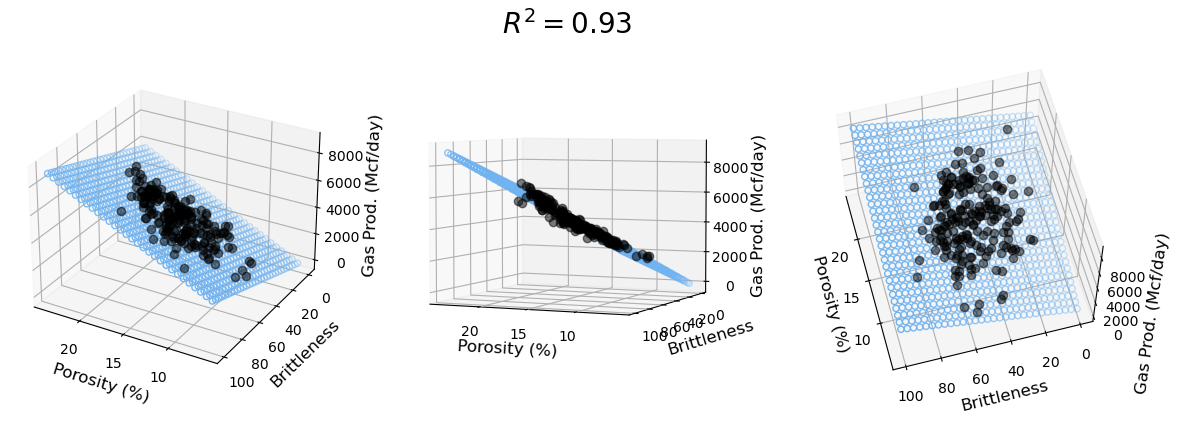

In [13]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()